# matplotlib

Ques 1:

Scipy:
We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.
Task:
1. fitting it to the periodic function
2. plot the fit
Data

Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25

Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

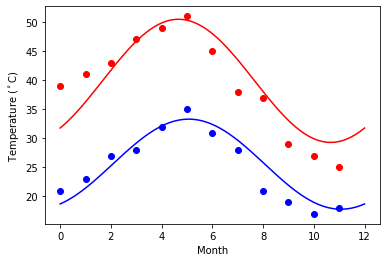

In [2]:
max_temp = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
min_temp = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

months = np.arange(12)

from scipy.optimize import curve_fit
def temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

popt_max, pcov_max = curve_fit(temps, months, max_temp, [20, 10, 0])
popt_min, pcov_min = curve_fit(temps, months, min_temp, [-40, 20, 0])

days = np.linspace(0, 12, num=365)
plt.plot(months, max_temp, 'ro')
plt.plot(days, temps(days, *popt_max), 'r-')
plt.plot(months, min_temp, 'bo')
plt.plot(days, temps(days, *popt_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

Ques 2:

Matplotlib:
This assignment is for visualization using matplotlib:
data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv(url)
Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [3]:
url="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic = pd.read_csv(url)

In [4]:
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


[male      843
female    466
Name: sex, dtype: int64]


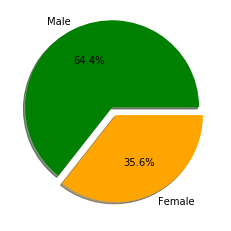

In [5]:
print([titanic["sex"].value_counts()])
male  = [titanic["sex"].value_counts()][0][0]
female  = [titanic["sex"].value_counts()][0][1]
maleFemaleProportion = [male, female]
colors = ['green', 'orange']
labels = 'Male', 'Female'
explode = (0.1, 0)

plt.pie(maleFemaleProportion, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',shadow=True, startangle=0)
plt.show()

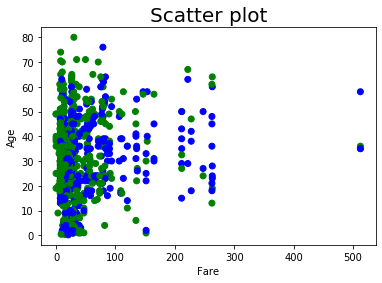

In [6]:
colors = {'male':'green', 'female':'blue'}
cleanedDf = titanic[titanic["sex"].notna()]
plt.scatter(cleanedDf["fare"], cleanedDf["age"], c=cleanedDf["sex"].apply(lambda x: colors[x]))
plt.xlabel('Fare', fontsize=10)
plt.ylabel('Age', fontsize=10)
plt.title('Scatter plot',fontsize=20)
plt.show()